Imports

In [7]:
import pandas as pd
import numpy as np
import MetaTrader5 as mt5
import mplfinance as mpf

from download_data import get_candle_data, get_tick_data, save_to_csv, timeframe_to_string, load_from_csv
from correct_data import correct_candle_data, correct_tick_data

Fibonacci: 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597

Download and save candle data

In [16]:
start_date = '2023-01-01'
end_date = '2024-01-01'
timeframe = mt5.TIMEFRAME_D1
symbol = "EURUSD"

candle_data = get_candle_data(symbol, timeframe, start_date, end_date)
corrected_candle_data = correct_candle_data(candle_data)
save_to_csv(corrected_candle_data, f"{symbol}_{timeframe_to_string(timeframe)}_{start_date}_{end_date}.csv")
corrected_candle_data.head()


Data saved to c:\Users\alpha.DESKTOP-55DQ8S8\Desktop\tfg\data\EURUSD_D1_2023-01-01_2024-01-01.csv


,time,open,high,low,close,volume,spread
0,2023-01-02,1.06755,1.07072,1.06501,1.06636,20576,0.00001
1,2023-01-03,1.06657,1.06828,1.05192,1.05474,94765,0.00001
2,2023-01-04,1.05480,1.06347,1.05404,1.06055,88867,0.00001
3,2023-01-05,1.06065,1.06310,1.05146,1.05210,80830,0.00001
4,2023-01-06,1.05209,1.06475,1.04814,1.06388,80563,0.00001


Download and save tick data

In [ ]:
start_date = '2025-01-01'
end_date = '2025-01-03'
symbol = "EURUSD"

tick_data = get_tick_data(symbol, start_date, end_date)
corrected_tick_data = correct_tick_data(tick_data)
save_to_csv(corrected_tick_data, f"{symbol}_ticks_{start_date}_{end_date}.csv")
corrected_tick_data.head()

Data saved to c:\Users\alpha.DESKTOP-55DQ8S8\Desktop\tfg\data\EURUSD_ticks_2025-01-01_2025-01-03.csv


,time,bid,ask,flags,spread
0,2025-01-02 00:00:07,1.03516,1.03589,134,0.00073
1,2025-01-02 00:02:28,1.03516,1.03592,134,0.00076
2,2025-01-02 00:04:01,1.03516,1.03591,134,0.00075
3,2025-01-02 00:05:02,1.03516,1.03589,134,0.00073
4,2025-01-02 00:05:04,1.03516,1.03590,4,0.00074


Plot candles

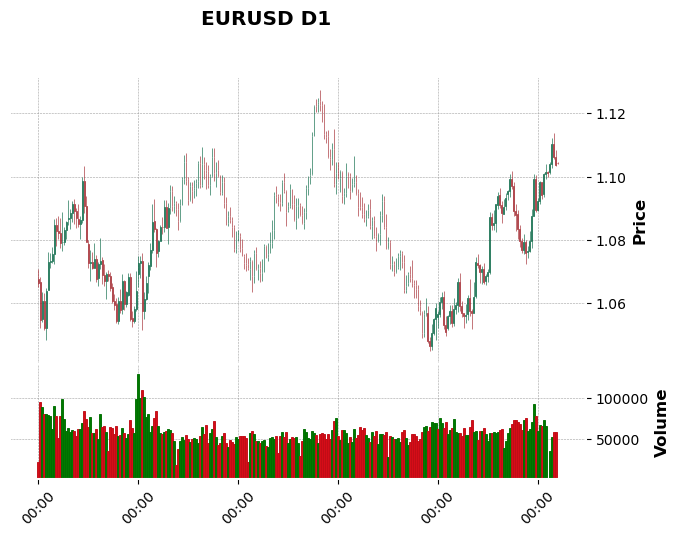

In [18]:
# Load the corrected candle data from CSV
loaded_candle_data = load_from_csv(f"{symbol}_{timeframe_to_string(timeframe)}_{start_date}_{end_date}.csv")
loaded_candle_data.index = pd.to_datetime(loaded_candle_data.index)

# Plot the corrected candle data
mpf.plot(loaded_candle_data, type='candle', style='charles', title=f"{symbol} {timeframe_to_string(timeframe)}", volume=True)